## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import warnings


#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/train.csv')

#### Show Top 5 Records

In [3]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
df.drop('sl_no', axis=1, inplace=True)

In [5]:
df['salary'] = df['salary'].fillna(0)

In [6]:
df['status'] = df['status'].replace({'Placed': 1, 'Not Placed': 0})

In [7]:
df.drop('salary', axis=1, inplace=True)

In [8]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1
1,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1
2,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1
3,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0
4,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1


In [ ]:
X = df.drop(columns=['status'], axis=1)
y = df['status']

In [27]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [28]:
X = preprocessor.fit_transform(X)

In [29]:
X.shape

(215, 20)

#### Preparing X and Y variables

In [30]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((172, 20), (43, 20))

#### Create an Evaluate Function to give all metrics after model Training

In [31]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [32]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "SVM Classifier": SVC(),
    "XGBoost Classifier": XGBClassifier(),
    "CatBoost Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

model_list = []
accuracy_list = []

for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    print(model_name)
    model_list.append(model_name)

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(accuracy_train))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(accuracy_test))
    accuracy_list.append(accuracy_test)

    print('=' * 35)
    print('\n')

# Now you can access the model names and their accuracy scores in model_list and accuracy_list, respectively.


Logistic Regression
Model performance for Training set
- Accuracy: 0.8953
----------------------------------
Model performance for Test set
- Accuracy: 0.8837


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.8837
----------------------------------
Model performance for Test set
- Accuracy: 0.7907


Decision Tree Classifier
Model performance for Training set
- Accuracy: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8372


Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8140


SVM Classifier
Model performance for Training set
- Accuracy: 0.9360
----------------------------------
Model performance for Test set
- Accuracy: 0.8140


XGBoost Classifier
Model performance for Training set
- Accuracy: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8372


CatBoost Classifier
Model p

### Results

In [34]:
pd.DataFrame(list(zip(model_list, accuracy_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Logistic Regression,0.883721
7,AdaBoost Classifier,0.860465
2,Decision Tree Classifier,0.837209
5,XGBoost Classifier,0.837209
3,Random Forest Classifier,0.813953
4,SVM Classifier,0.813953
1,K-Neighbors Classifier,0.790698
6,CatBoost Classifier,0.790698


In [37]:
log_model = LogisticRegression()
log_model =log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.37


## Plot y_pred and y_test

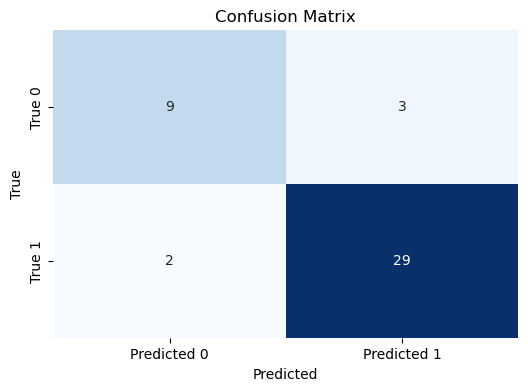

In [44]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["Predicted 0", "Predicted 1"], 
            yticklabels=["True 0", "True 1"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



### Observation
- model predicted with 5 wrong prediction.
